<a href="https://colab.research.google.com/github/Tora0407/Challenge-TelecomX-Fase1/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [97]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.1 Extracción de datos

In [98]:
df = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

## 2.1 Conoce el conjunto de datos

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


⚠️ Se observa que los datos se encuentran en diccionarios (`customer`, `phone`, `internet`, `account`), por lo tanto hay que normalizarlos

In [100]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

#verificamos si se realizó la normalización
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


✅ Ahora eliminaremos los diccionarios del dataframe principal y agregaremos los datos normalizados

In [101]:
#Eliminamos las columnas con los diccionarios
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
#Concatenamos al dataframe las nuevas columnas
df = pd.concat([df, df_customer, df_phone, df_internet, df_account], axis=1)
df.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
768,1092-GANHU,Yes,Male,0,No,No,17,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,76.65,1313.55
2921,4061-UKJWL,No,Male,0,No,No,3,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,45.45,141.7
6994,9631-RXVJM,No,Male,0,No,No,35,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.25,677.9
3543,4883-QICIH,Yes,Male,0,Yes,Yes,32,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.75,2347.9
4082,5590-BYNII,Yes,Male,0,No,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.75,2095


✅ Ahora vemos que las columnas coinciden con el diccionario brindado

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##2.2 Comprobación de incoherencias en los datos

In [103]:
#Verificamos duplicados
df.duplicated().sum()

np.int64(0)

In [104]:
#Verificamos valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [105]:
#Verificamos valores únicos
pd.unique(df['Churn'])

array(['No', 'Yes', ''], dtype=object)

⚠️ OJO: Observamos que en `Churn` hay como valor único un String vacío, veamos cuántos hay en total

In [106]:
(df['Churn']=='').sum()

np.int64(224)

✅ Ahora veamos cuantos valores vacíos o espacios hay en las columnas

In [107]:
columnas = ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
cantidad_nulos = []
cantidad_espacios = []
for c in columnas:
  cantidad_nulos.append((df[c] == '').sum())
  cantidad_espacios.append((df[c] == ' ').sum())

df_nulos = pd.DataFrame({'columna': columnas, 'Nulos': cantidad_nulos, 'Espacios': cantidad_espacios})
df_nulos

,columna,Nulos,Espacios
0,customerID,0,0
1,Churn,224,0
2,gender,0,0
3,SeniorCitizen,0,0
4,Partner,0,0
5,Dependents,0,0
6,tenure,0,0
7,PhoneService,0,0
8,MultipleLines,0,0
9,InternetService,0,0


Se observa que hay **224** Strings nulos en la columna `Churn` y **11** Espacios en la columna `Charges.total`

Procedamos entonces a volverlos nulos para eliminarlos

In [108]:
#Reemplazamos esos datos por NaN
df['Churn'] = df['Churn'].replace('', np.nan)
df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)

df.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [109]:
#Una vez vueltos nulos los eliminamos
df.dropna(inplace=True)
df[['Churn','Charges.Total']].isnull().sum()

,0
Churn,0
Charges.Total,0


##2.3 Manejo de inconsistencias

Verificamos si los datos tienen su correcto tipo

In [110]:
df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


❌ Sus Dtypes son incorrectos, vamos a corregirlos

In [111]:
#Datos tipo String
df['customerID'] = df['customerID'].str.strip() #para evitar que tengan espacios al inicio y al final
#Cambiemos a minusculas
df['gender'] = df['gender'].str.lower()
df['PaymentMethod'] = df['PaymentMethod'].str.lower()
df['Contract'] = df['Contract'].str.lower()

df[['customerID', 'gender', 'PaymentMethod', 'Contract']].sample(10)

,customerID,gender,PaymentMethod,Contract
6108,8350-NYMVI,female,bank transfer (automatic),month-to-month
4364,5985-TBABQ,female,mailed check,one year
4127,5652-MSDEY,female,mailed check,month-to-month
749,1074-AMIOH,female,bank transfer (automatic),month-to-month
3735,5144-PQCDZ,male,mailed check,month-to-month
647,0924-BJCRC,female,electronic check,month-to-month
904,1269-FOYWN,male,bank transfer (automatic),one year
5902,8064-RAVOH,male,electronic check,month-to-month
1968,2794-XIMMO,male,electronic check,one year
4991,6828-HMKWP,male,bank transfer (automatic),two year


###2.3.1 Estandarización y transformación de datos

Para mayor entendimiento, cambiaremos los datos a español

In [112]:
df['gender'] = df['gender'].replace('male', 'masculino')
df['gender'] = df['gender'].replace('female', 'femenino')

df['gender'].sample(5)

,gender
3156,femenino
2407,masculino
4126,femenino
6326,femenino
1370,femenino


In [113]:
df['PaymentMethod'].unique()

array(['mailed check', 'electronic check', 'credit card (automatic)',
       'bank transfer (automatic)'], dtype=object)

In [114]:
metodo_pago = {'mailed check':'cheque por correo',
               'electronic check':'cheque electrónico',
               'credit card (automatic)':'tarjeta de credito (automatica)',
               'bank transfer (automatic)':'transferencia bancaria (automatica)'}

df['PaymentMethod'] = df['PaymentMethod'].map(metodo_pago)
df['PaymentMethod'].sample(10)

,PaymentMethod
6145,cheque electrónico
3341,tarjeta de credito (automatica)
692,cheque por correo
3675,cheque por correo
2230,tarjeta de credito (automatica)
3288,tarjeta de credito (automatica)
1932,transferencia bancaria (automatica)
2258,transferencia bancaria (automatica)
7014,cheque electrónico
4467,cheque electrónico


In [115]:
df['Contract'].unique()

array(['one year', 'month-to-month', 'two year'], dtype=object)

In [116]:
tipo_contrato = {
    'one year':'anual',
    'month-to-month':'mensual',
    'two year':'bianual'
}

df['Contract'] = df['Contract'].map(tipo_contrato)
df['Contract'].sample(10)

,Contract
5197,bianual
7134,mensual
4370,bianual
5693,bianual
4493,bianual
966,mensual
4073,mensual
6177,anual
4089,mensual
662,bianual


Ahora para los datos de `Yes` y `No` los volveremos booleanos

In [117]:
# Identificar columnas con Yes/No
yes_no_cols = [col for col in df.columns if df[col].isin(["Yes", "No"]).all()]

yes_no_cols

['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [118]:
# Convertirlas a booleanos
df[yes_no_cols] = df[yes_no_cols].apply(lambda col: col.map({"Yes": True, "No": False}))

# Verificar cambios
df[yes_no_cols].head()

,Churn,Partner,Dependents,PhoneService,PaperlessBilling
0,False,True,True,True,True
1,False,False,False,True,False
2,True,False,False,True,True
3,True,True,False,True,True
4,True,True,False,True,True


In [119]:
df[yes_no_cols].dtypes

,0
Churn,bool
Partner,bool
Dependents,bool
PhoneService,bool
PaperlessBilling,bool


Terminemos de asignar los tipos de datos

In [120]:
#String
df['customerID'] = df['customerID'].astype('string')

#Integer
df['tenure'] = df['tenure'].astype('int64')

#Float
df['Charges.Monthly'] = df['Charges.Monthly'].astype('float64')
df['Charges.Total'] = df['Charges.Total'].astype('float64')

#cambiemos el tipo de dato de la columna "SeniorCitizen"
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: False, 1: True})

#Category
categorias = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df[categorias] = df[categorias].astype('category')

df.dtypes

,0
customerID,string[python]
Churn,bool
gender,category
SeniorCitizen,bool
Partner,bool
Dependents,bool
tenure,int64
PhoneService,bool
MultipleLines,category
InternetService,category


✅ Por ultimo renombraremos las columnas a español

In [121]:
df = df.rename(columns={
    "customerID": "id_cliente",
    "Churn": "abandono",  # cliente se fue o no
    "gender": "genero",
    "SeniorCitizen": "adulto_mayor",
    "Partner": "pareja",
    "Dependents": "dependientes",
    "tenure": "meses_contrato",
    "PhoneService": "servicio_telefonico",
    "MultipleLines": "multiples_lineas",
    "InternetService": "servicio_internet",
    "OnlineSecurity": "seguridad_en_linea",
    "OnlineBackup": "respaldo_en_linea",
    "DeviceProtection": "proteccion_dispositivo",
    "TechSupport": "soporte_tecnico",
    "StreamingTV": "tv_streaming",
    "StreamingMovies": "peliculas_streaming",
    "Contract": "tipo_contrato",
    "PaperlessBilling": "factura_electronica",
    "PaymentMethod": "metodo_pago",
    "Charges.Monthly": "cargos_mensuales",
    "Charges.Total": "cargos_totales"
})

df.columns

Index(['id_cliente', 'abandono', 'genero', 'adulto_mayor', 'pareja',
       'dependientes', 'meses_contrato', 'servicio_telefonico',
       'multiples_lineas', 'servicio_internet', 'seguridad_en_linea',
       'respaldo_en_linea', 'proteccion_dispositivo', 'soporte_tecnico',
       'tv_streaming', 'peliculas_streaming', 'tipo_contrato',
       'factura_electronica', 'metodo_pago', 'cargos_mensuales',
       'cargos_totales'],
      dtype='object')

##2.4 Columna de cuentas diarias

In [122]:
df['cuentas_diarias'] = (df['cargos_mensuales']/30).round(2)

df['cuentas_diarias']

,cuentas_diarias
0,2.19
1,2.00
2,2.46
3,3.27
4,2.80
...,...
7262,1.84
7263,2.84
7264,1.68
7265,2.26


#📊 Carga y análisis

##3.1 Análisis Descriptivo

In [123]:
df.describe()

,meses_contrato,cargos_mensuales,cargos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159891
std,24.545260,30.085974,2266.771362,1.002955
min,1.000000,18.250000,18.800000,0.610000
25%,9.000000,35.587500,401.450000,1.187500
50%,29.000000,70.350000,1397.475000,2.340000
75%,55.000000,89.862500,3794.737500,2.992500
max,72.000000,118.750000,8684.800000,3.960000


In [124]:
df.sample(10)

,id_cliente,abandono,genero,adulto_mayor,pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,servicio_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,cuentas_diarias
1747,2480-SQIOB,False,masculino,False,True,True,4,True,No,DSL,...,No,No,No,No,mensual,False,cheque electrónico,44.80,169.65,1.49
4872,6661-HBGWL,True,femenino,True,False,False,42,True,Yes,Fiber optic,...,Yes,No,Yes,Yes,mensual,True,transferencia bancaria (automatica),104.75,4323.45,3.49
632,0899-LIIBW,False,masculino,False,True,False,34,True,Yes,Fiber optic,...,Yes,No,Yes,Yes,mensual,False,cheque electrónico,100.85,3527.30,3.36
6536,8984-EYLLL,False,masculino,False,True,False,64,True,Yes,Fiber optic,...,No,Yes,Yes,Yes,bianual,True,cheque electrónico,105.25,6823.40,3.51
6388,8775-LHDJH,True,femenino,True,True,False,1,True,Yes,Fiber optic,...,No,No,Yes,No,mensual,True,cheque electrónico,90.60,90.60,3.02
6036,8237-ULIXL,False,femenino,False,True,False,72,True,Yes,No,...,No internet service,No internet service,No internet service,No internet service,bianual,False,tarjeta de credito (automatica),24.85,1871.85,0.83
3869,5297-MDOIR,False,femenino,False,True,False,63,True,No,Fiber optic,...,Yes,No,No,No,anual,True,tarjeta de credito (automatica),81.15,5224.50,2.70
6195,8496-EJAUI,True,masculino,False,False,False,19,True,No,Fiber optic,...,No,No,No,No,mensual,True,tarjeta de credito (automatica),73.85,1424.50,2.46
61,0104-PPXDV,False,masculino,False,True,False,58,True,No,DSL,...,Yes,No,No,No,anual,False,tarjeta de credito (automatica),50.30,2878.55,1.68
5701,7789-CRUVC,False,femenino,True,True,False,61,True,Yes,Fiber optic,...,Yes,Yes,No,No,mensual,True,tarjeta de credito (automatica),94.20,5895.45,3.14


##3.2 Distribución de evasión

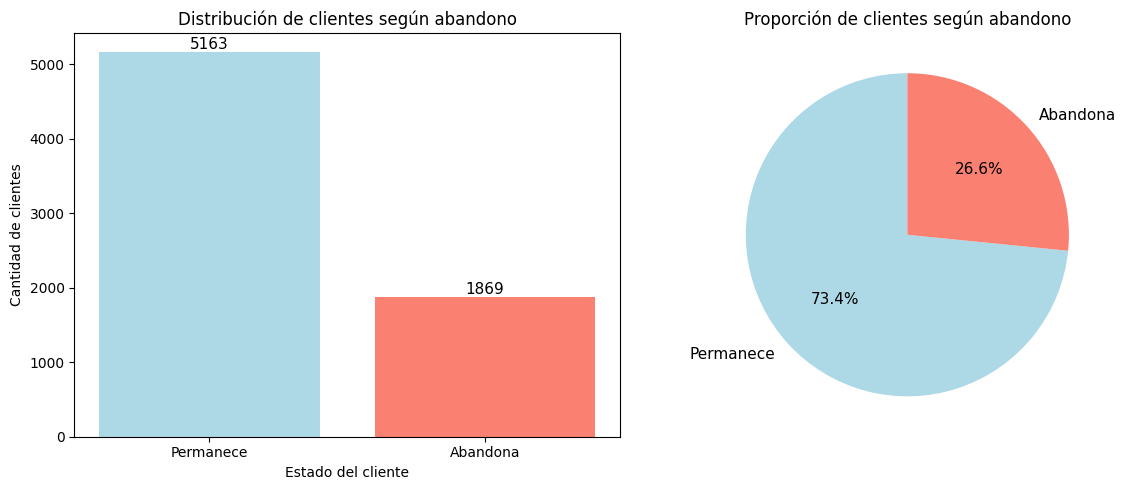

In [125]:
import matplotlib.pyplot as plt

# Contar valores de la columna 'abandono'
churn_counts = df["abandono"].value_counts()

# Renombrar categorías solo para visualización
labels = ["Permanece" if val == False else "Abandona" for val in churn_counts.index]

# Colores más suaves
colors = ["lightblue", "salmon"]

# Crear figura con 2 gráficos en la misma fila
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Gráfico de Barras ---
bars = axes[0].bar(labels, churn_counts.values, color=colors)

# Agregar etiquetas encima de las barras
for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                 str(bar.get_height()), ha='center', va='bottom', fontsize=11)

axes[0].set_title("Distribución de clientes según abandono")
axes[0].set_xlabel("Estado del cliente")
axes[0].set_ylabel("Cantidad de clientes")

# --- Gráfico de Pie ---
axes[1].pie(churn_counts,
            labels=labels,
            autopct='%1.1f%%',
            colors=colors,
            startangle=90,
            textprops={'fontsize': 11})

axes[1].set_title("Proporción de clientes según abandono")

# Mostrar ambos
plt.tight_layout()
plt.show()


##3.3 Recuento de evasión por variables categóricas

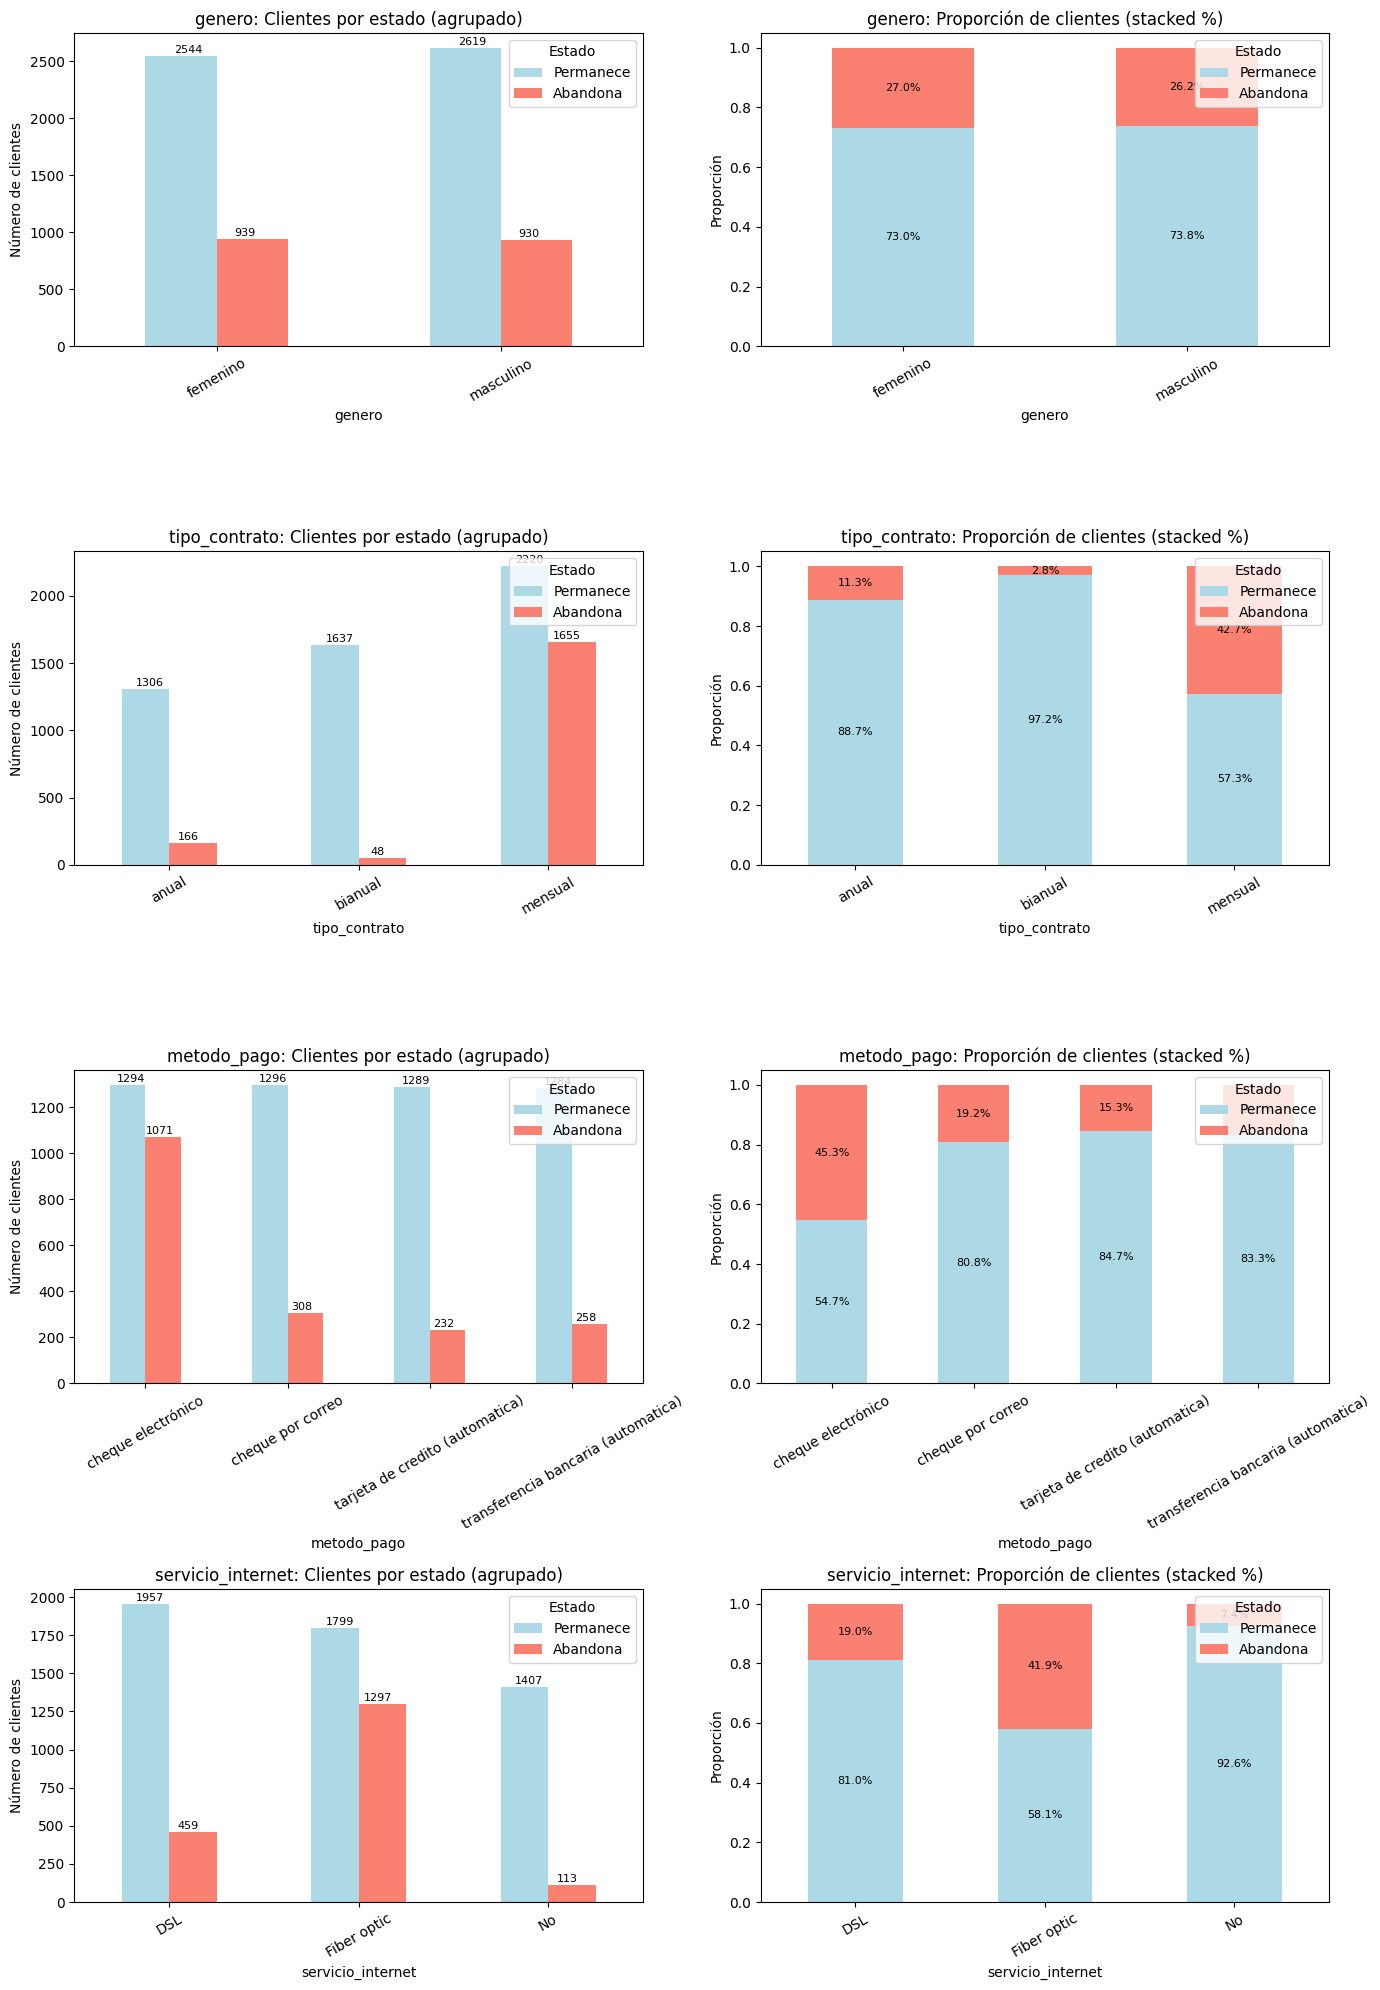

In [126]:
# Variables categóricas más importantes
categorical_vars = ["genero", "tipo_contrato", "metodo_pago", "servicio_internet"]

# Configuración de la figura
fig, axes = plt.subplots(len(categorical_vars), 2, figsize=(14, 5*len(categorical_vars)))

for i, var in enumerate(categorical_vars):
    # --- Datos absolutos (para barplot agrupado) ---
    counts = df.groupby([var, "abandono"]).size().unstack(fill_value=0)
    counts.columns = ["Permanece", "Abandona"]

    # --- Datos proporcionales (para stacked % barplot) ---
    props = counts.div(counts.sum(axis=1), axis=0)

    # --- Gráfico agrupado ---
    counts.plot(kind="bar", ax=axes[i,0], color=colors)
    axes[i,0].set_title(f"{var}: Clientes por estado (agrupado)")
    axes[i,0].set_xlabel(var)
    axes[i,0].set_ylabel("Número de clientes")
    axes[i,0].legend(title="Estado", loc="upper right")
    axes[i,0].tick_params(axis='x', rotation=30)

    # Etiquetas encima de las barras
    for j, categoria in enumerate(counts.index):
        for k, estado in enumerate(counts.columns):
            value = counts.loc[categoria, estado]
            axes[i,0].text(j + (k-0.5)*0.2, value + max(counts.values.flatten())*0.01,
                           str(value), ha="center", fontsize=8)

    # --- Gráfico stacked (% por categoría) ---
    props.plot(kind="bar", stacked=True, ax=axes[i,1], color=colors)
    axes[i,1].set_title(f"{var}: Proporción de clientes (stacked %)")
    axes[i,1].set_xlabel(var)
    axes[i,1].set_ylabel("Proporción")
    axes[i,1].legend(title="Estado", loc="upper right")
    axes[i,1].tick_params(axis='x', rotation=30)

    # Etiquetas de porcentaje dentro de las barras
    for j, categoria in enumerate(props.index):
        bottom = 0
        for k, estado in enumerate(props.columns):
            value = props.loc[categoria, estado]
            axes[i,1].text(j, bottom + value/2, f"{value*100:.1f}%",
                           ha="center", va="center", fontsize=8)
            bottom += value

plt.tight_layout()
plt.show()

In [127]:
# Diccionario para guardar las tablas
summary_tables = {}

for var in categorical_vars:
    # Conteo absoluto
    counts = df.groupby([var, "abandono"]).size().unstack(fill_value=0)
    counts.columns = ["Permanece", "Abandona"]

    # Calcular porcentaje de abandono
    counts["Total"] = counts["Permanece"] + counts["Abandona"]
    counts["% Abandona"] = (counts["Abandona"] / counts["Total"] * 100).round(1)

    # Guardar en diccionario
    summary_tables[var] = counts

    print(f"\nResumen: {var.upper()}")
    display(counts)


Resumen: GENERO


,Permanece,Abandona,Total,% Abandona
genero,,,,
femenino,2544,939,3483,27.0
masculino,2619,930,3549,26.2



Resumen: TIPO_CONTRATO


,Permanece,Abandona,Total,% Abandona
tipo_contrato,,,,
anual,1306,166,1472,11.3
bianual,1637,48,1685,2.8
mensual,2220,1655,3875,42.7



Resumen: METODO_PAGO


,Permanece,Abandona,Total,% Abandona
metodo_pago,,,,
cheque electrónico,1294,1071,2365,45.3
cheque por correo,1296,308,1604,19.2
tarjeta de credito (automatica),1289,232,1521,15.3
transferencia bancaria (automatica),1284,258,1542,16.7



Resumen: SERVICIO_INTERNET


,Permanece,Abandona,Total,% Abandona
servicio_internet,,,,
DSL,1957,459,2416,19.0
Fiber optic,1799,1297,3096,41.9
No,1407,113,1520,7.4


##3.4 Conteo de evasión por variables numéricas

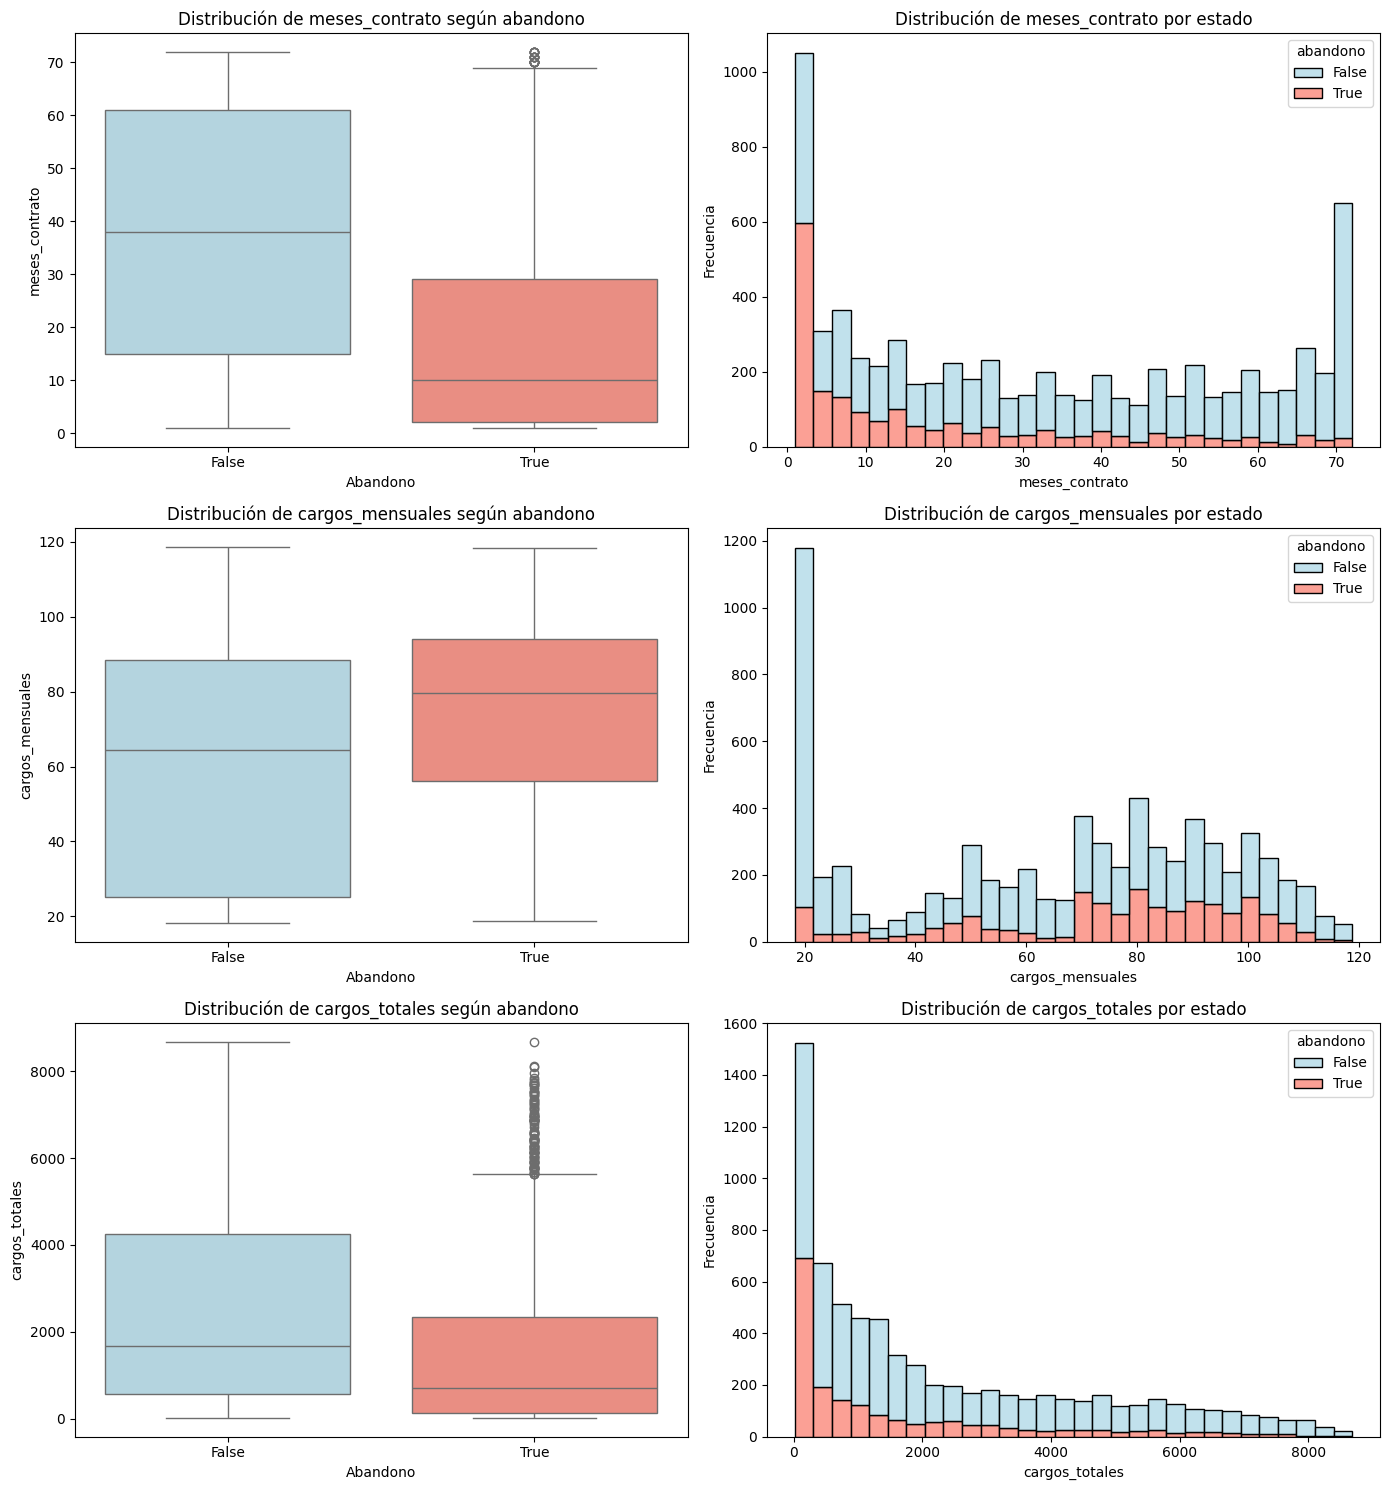

In [128]:
import seaborn as sns

# Variables numéricas a analizar
numeric_vars = ["meses_contrato", "cargos_mensuales", "cargos_totales"]

fig, axes = plt.subplots(len(numeric_vars), 2, figsize=(14, 5*len(numeric_vars)))

for i, var in enumerate(numeric_vars):
    # --- Boxplot ---
    sns.boxplot(data=df, x="abandono", y=var, palette=["lightblue", "salmon"], ax=axes[i,0])
    axes[i,0].set_title(f"Distribución de {var} según abandono")
    axes[i,0].set_xlabel("Abandono")
    axes[i,0].set_ylabel(var)

    # --- Histograma / KDE ---
    sns.histplot(data=df, x=var, hue="abandono", multiple="stack",
                 palette=["lightblue", "salmon"], ax=axes[i,1], bins=30)
    axes[i,1].set_title(f"Distribución de {var} por estado")
    axes[i,1].set_xlabel(var)
    axes[i,1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [129]:
# Variables numéricas a analizar
numeric_vars = ["meses_contrato", "cargos_mensuales", "cargos_totales"]

# Resumen estadístico segmentado por abandono
summary_stats = df.groupby("abandono")[numeric_vars].agg(
    ["mean", "median", "std", "min", "max"]
).round(2)

# Mostrar tabla
summary_stats

meses_contrato                       cargos_mensuales                \
                   mean median    std min max             mean median    std   
abandono                                                                       
False             37.65   38.0  24.08   1  72            61.31  64.45  31.09   
True              17.98   10.0  19.53   1  72            74.44  79.65  24.67   

                        cargos_totales                                    
            min     max           mean   median      std    min      max  
abandono                                                                  
False     18.25  118.75        2555.34  1683.60  2329.46  18.80  8672.45  
True      18.85  118.35        1531.80   703.55  1890.82  18.85  8684.80

#📄Informe final

## 🔹 Introducción
El objetivo de este análisis es comprender el problema de la evasión de clientes (*churn*) en la empresa de telecomunicaciones **TelecomX LATAM**.  
Se busca identificar patrones que expliquen por qué los clientes se dan de baja, y generar insights estratégicos para reducir esta tasa.

## 🔹 Limpieza y Tratamiento de Datos
- Importación del dataset original.
- Conversión de variables binarias ("Yes/No") a valores booleanos (`True/False`).
- Renombrado de columnas al español para facilitar la interpretación.
- Revisión de valores faltantes y duplicados.
- Preparación de variables categóricas y numéricas para análisis.

## 🔹 Análisis Exploratorio de Datos
Incluye visualizaciones de:
- Distribución general de la variable **abandono**.
- Comparaciones de abandono según variables categóricas (género, tipo de contrato, método de pago, servicio de internet).
- Comparaciones de abandono según variables numéricas (meses de contrato, cargos mensuales, cargos totales).

## 🔹 Conclusiones e Insights
- Los clientes con **contrato mensual** muestran mayor propensión al abandono.
- El método de pago con **tarjeta virtual/automática** está más asociado a permanencia.
- Los clientes con **menor tiempo de contrato** y **gasto total reducido** presentan mayor probabilidad de abandono.
- Los servicios de internet tienen un peso significativo en la decisión de continuar.

## 🔹 Recomendaciones
1. Incentivar a los clientes de contrato mensual a migrar hacia contratos de más largo plazo mediante descuentos.
2. Promover el pago automático como método de pago preferente.
3. Diseñar estrategias de fidelización para nuevos clientes durante sus primeros meses.
4. Mejorar la calidad y percepción de los servicios de internet y soporte técnico.


#¡Extra! Análisis de correlación entre variables

In [130]:
# Seleccionamos solo variables numéricas
num_vars = df.select_dtypes(include=['int64', 'float64']).copy()

# Incluimos la variable objetivo (abandono) como 0/1
num_vars['abandono'] = df['abandono'].astype(int)

# Calculamos la correlación
corr_matrix = num_vars.corr()

corr_matrix['abandono'].sort_values(ascending=False)

,abandono
abandono,1.000000
cuentas_diarias,0.192914
cargos_mensuales,0.192858
cargos_totales,-0.199484
meses_contrato,-0.354049


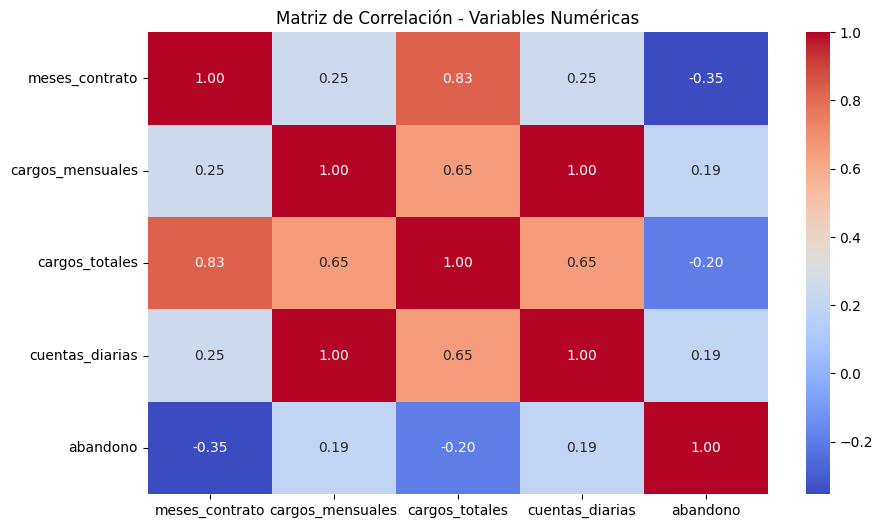

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variables Numéricas")
plt.show()

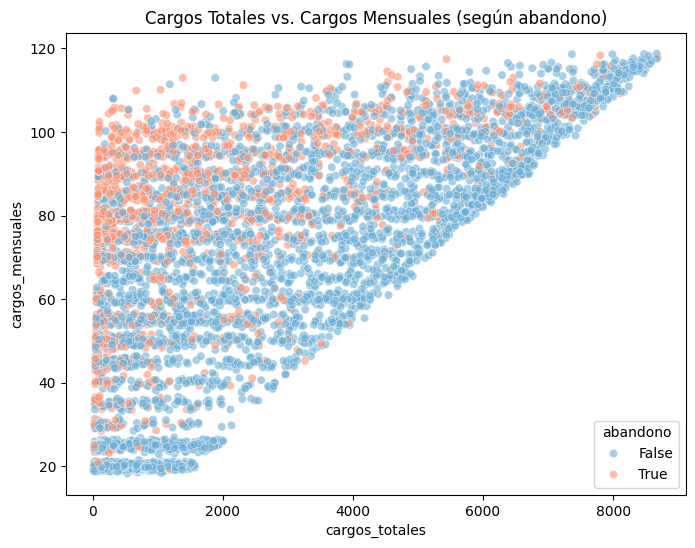

In [134]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="cargos_totales", y="cargos_mensuales",
    hue="abandono", data=df, palette={0:"#6BAED6", 1:"#FC9272"}, alpha=0.6
)
plt.title("Cargos Totales vs. Cargos Mensuales (según abandono)")
plt.show()